In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, cohen_kappa_score, accuracy_score, mean_absolute_error, mean_squared_error

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [2]:
def train(classifier, X, y, class_names):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=seed)
    
    ##TREINANDO MEU ALGORITMO
    classifier.fit(X_train, y_train)
    
    ##Predicoes para medição da Acurácia
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    
    
    print("Acurracia: %s" % classifier.score(X_test,y_test))
    print("Kappa: %s" % str(cohen_kappa_score(y_test, y_pred)))
    print("F1: %s" % str(f1_score(y_test, y_pred, average=None )))
    print("Recall: %s"% str(recall_score(y_test, y_pred, average=None)))
    print("Precision: %s" % str(precision_score(y_test, y_pred, average=None)))
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

    
    return classifier

In [3]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [4]:
seed = 5
np.random.seed(seed)
data = pd.read_csv("dataAllFeatures.csv", engine='python', encoding='utf-8')

In [5]:
data.head()

,year,duration,reviews_from_users,reviews_from_critics,total_votes,males_allages_avg_vote,males_allages_votes,females_allages_avg_vote,females_allages_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes,weighted_average_vote
0,1994.0,142.0,8232.0,164.0,154,6.2,97.0,6.0,35.0,6.4,51.0,6.0,70.0,5.9
1,2008.0,152.0,6938.0,423.0,589,6.1,425.0,6.2,50.0,6.0,96.0,6.2,331.0,6.1
2,2010.0,148.0,3927.0,473.0,188,5.9,146.0,5.7,15.0,6.2,31.0,5.9,123.0,5.8
3,1999.0,139.0,3758.0,370.0,446,5.1,299.0,5.9,39.0,5.5,207.0,4.7,105.0,5.2
4,1994.0,154.0,3058.0,289.0,2237,7.0,1607.0,7.2,215.0,7.0,488.0,7.0,1166.0,7.0


In [7]:
data.describe()

,year,duration,reviews_from_users,reviews_from_critics,total_votes,males_allages_avg_vote,males_allages_votes,females_allages_avg_vote,females_allages_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes,weighted_average_vote
count,69968.000000,69968.000000,69968.000000,69968.000000,8.585500e+04,85854.000000,8.585400e+04,85774.000000,85774.000000,85646.000000,85646.000000,85854.000000,85854.000000,85855.000000
mean,1992.768980,99.854662,50.934670,28.826649,9.493490e+03,5.817172,6.029016e+03,6.039408,1366.759461,5.925910,1647.822537,5.749638,4332.940865,5.898656
std,24.883932,21.866374,188.159383,59.728828,5.357436e+04,1.248058,3.364652e+04,1.346245,7672.675428,1.308087,8455.978158,1.285570,23243.807279,1.234987
min,1894.000000,41.000000,1.000000,1.000000,9.900000e+01,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1977.000000,88.000000,4.000000,3.000000,2.050000e+02,5.100000,1.320000e+02,5.300000,22.000000,5.200000,24.000000,5.000000,95.000000,5.200000
50%,2002.000000,96.000000,11.000000,9.000000,4.840000e+02,6.000000,3.080000e+02,6.300000,58.000000,6.100000,81.000000,6.000000,225.000000,6.100000
75%,2013.000000,108.000000,31.000000,25.000000,1.766500e+03,6.700000,1.141000e+03,7.000000,227.000000,6.800000,335.000000,6.700000,841.000000,6.800000
max,2020.000000,808.000000,10472.000000,999.000000,2.278845e+06,10.000000,1.409165e+06,10.000000,278964.000000,10.000000,348363.000000,10.000000,887226.000000,9.900000


In [8]:
data.dropna(axis=0, inplace=True)
data.weighted_average_vote = data.weighted_average_vote.round()

In [9]:
target = data['weighted_average_vote'].values
X = data.drop('weighted_average_vote',axis=1)
y = target

## Treinamento com todas as variáveis

In [10]:
print('Naive Bayes')
modeloNaiveBayes = train(GaussianNB(), X, y, target)

Naive Bayes
Acurracia: 0.07385467921463718
Kappa: -0.014228701909497543
F1: [0.   0.05 0.16 0.03 0.06 0.16 0.06 0.13 0.06 0.01]
Recall: [0.94 0.02 0.18 0.08 0.04 0.1  0.03 0.08 0.13 0.5 ]
Precision: [0.   0.55 0.15 0.02 0.08 0.41 0.34 0.25 0.04 0.  ]
Mean Absolute Error: 2.837147088329432
Mean Squared Error: 11.086800745234797
Root Mean Squared Error: 3.329684781662492


In [11]:
print('RANDOMFOREST')
modeloRandomForest = train(RandomForestClassifier(n_estimators=20, random_state=seed), X, y, target)

RANDOMFOREST
Acurracia: 0.9391391582668513
Kappa: 0.9186863427157892
F1: [0.83 0.93 0.9  0.91 0.91 0.95 0.95 0.94 0.78 0.  ]
Recall: [0.75 0.94 0.91 0.91 0.92 0.95 0.95 0.93 0.72 0.  ]
Precision: [0.92 0.92 0.89 0.91 0.91 0.95 0.95 0.96 0.85 0.  ]
Mean Absolute Error: 0.06382267233554674
Mean Squared Error: 0.07223044952945111
Root Mean Squared Error: 0.26875723158540515


C:\Users\jeamb\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


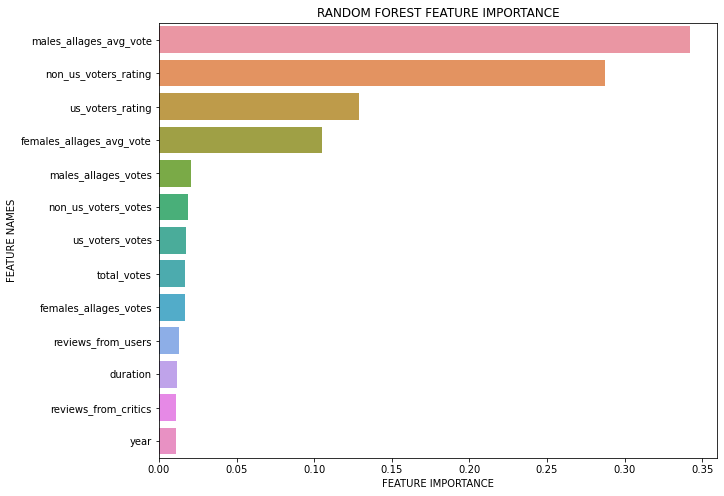

In [12]:
plot_feature_importance(modeloRandomForest.feature_importances_,X.columns,'RANDOM FOREST ')

In [13]:
print('XGBoost')
modeloXGBoost = train(XGBClassifier(n_estimators=20, random_state=seed), X, y, target)

XGBoost
[14:42:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jeamb\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:42:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Acurracia: 0.9406678450293795
Kappa: 0.9207152544993121
F1: [0.83 0.92 0.9  0.92 0.92 0.95 0.95 0.95 0.83 0.67]
Recall: [0.75 0.94 0.9  0.92 0.92 0.95 0.95 0.93 0.82 0.5 ]
Precision: [0.92 0.91 0.9  0.91 0.92 0.95 0.95 0.96 0.84 1.  ]
Mean Absolute Error: 0.06234175703434768
Mean Squared Error: 0.07103616299622606
Root Mean Squared Error: 0.2665261019041588


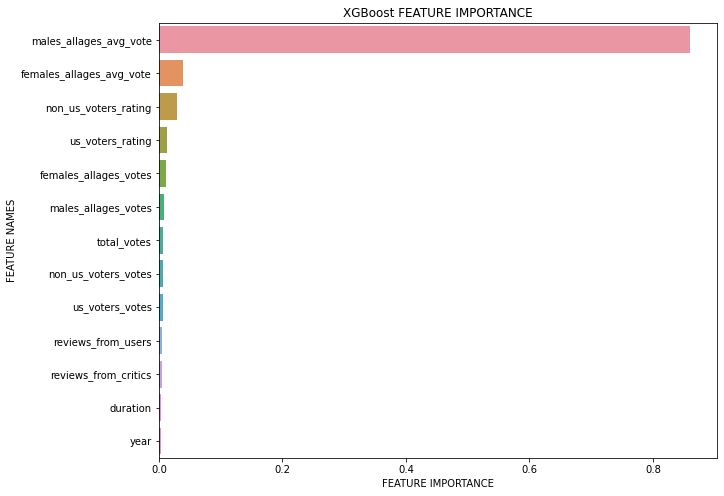

In [14]:
plot_feature_importance(modeloXGBoost.feature_importances_,X.columns,'XGBoost ')

## Retirando as variáveis importantes

In [25]:
dataWithoutTopFeatures = pd.read_csv("dataWithoutTopFeatures.csv", engine='python', encoding='utf-8')

In [16]:
dataWithoutTopFeatures.head()

,year,duration,reviews_from_users,reviews_from_critics,total_votes,females_allages_votes,us_voters_votes,weighted_average_vote
0,1994.0,142.0,8232.0,164.0,154,35.0,51.0,5.9
1,2008.0,152.0,6938.0,423.0,589,50.0,96.0,6.1
2,2010.0,148.0,3927.0,473.0,188,15.0,31.0,5.8
3,1999.0,139.0,3758.0,370.0,446,39.0,207.0,5.2
4,1994.0,154.0,3058.0,289.0,2237,215.0,488.0,7.0


In [17]:
dataWithoutTopFeatures.dropna(axis=0, inplace=True)
dataWithoutTopFeatures.weighted_average_vote = data.weighted_average_vote.round()

In [18]:
target = dataWithoutTopFeatures['weighted_average_vote'].values
X = dataWithoutTopFeatures.drop('weighted_average_vote',axis=1)
y = target

## Treinamento sem as variáveis importantes

In [19]:
print('Naive Bayes')
modeloNaiveBayes = train(GaussianNB(), X, y, target)

Naive Bayes
Acurracia: 0.07122724884154207
Kappa: 0.0021589837446872595
F1: [0.   0.01 0.04 0.05 0.05 0.17 0.06 0.12 0.06 0.  ]
Recall: [0.94 0.01 0.18 0.05 0.03 0.11 0.03 0.08 0.13 0.  ]
Precision: [0.   0.01 0.02 0.04 0.09 0.44 0.34 0.24 0.04 0.  ]
Mean Absolute Error: 3.212200831223427
Mean Squared Error: 13.539148712559117
Root Mean Squared Error: 3.679558222471703


In [20]:
print('RANDOMFOREST')
modeloRandomForest = train(RandomForestClassifier(n_estimators=20, random_state=seed), X, y, target)

RANDOMFOREST
Acurracia: 0.3860411789996656
Kappa: 0.1275824463155425
F1: [0.   0.01 0.04 0.17 0.2  0.51 0.38 0.28 0.13 0.  ]
Recall: [0.   0.01 0.03 0.14 0.17 0.62 0.37 0.2  0.08 0.  ]
Precision: [0.   0.07 0.1  0.23 0.23 0.43 0.39 0.48 0.43 0.  ]
Mean Absolute Error: 0.8741699708594086
Mean Squared Error: 1.5749773085558687
Root Mean Squared Error: 1.2549809992808132


C:\Users\jeamb\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


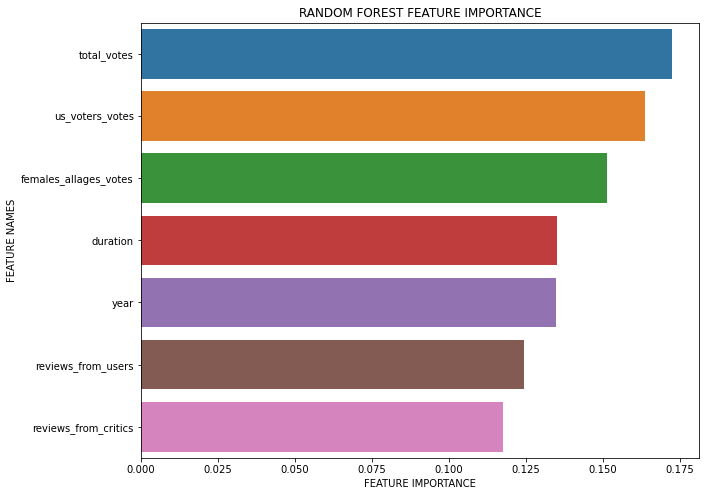

In [21]:
plot_feature_importance(modeloRandomForest.feature_importances_,X.columns,'RANDOM FOREST ')

In [22]:
print('XGBoost')
modeloXGBoost = train(XGBClassifier(n_estimators=20, random_state=seed), X, y, target)

XGBoost
[14:43:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jeamb\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:43:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Acurracia: 0.418478001242058
Kappa: 0.13296084364468652
F1: [0.   0.01 0.   0.09 0.12 0.54 0.4  0.3  0.27 0.  ]
Recall: [0.   0.   0.   0.05 0.07 0.77 0.37 0.2  0.18 0.  ]
Precision: [0.   0.25 0.   0.3  0.27 0.42 0.44 0.58 0.58 0.  ]
Mean Absolute Error: 0.8070032962308317
Mean Squared Error: 1.42029331677256
Root Mean Squared Error: 1.191760595410236


C:\Users\jeamb\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


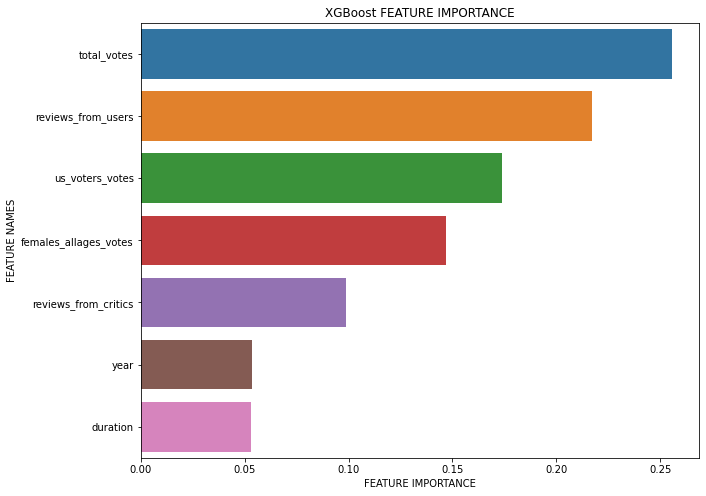

In [23]:
plot_feature_importance(modeloXGBoost.feature_importances_,X.columns,'XGBoost ')